# Heart Stroke Prediction
 
 ABSTRACT

Day by day the cases of heart stroke diseases are increasing at a rapid rate and its very important and concerning to predict such diseases beforehand.the research mainly focuses on which patient is more likely to have a heart stroke diseases based on various medical attributes.In this heartstroke diseases prediction system to pridict wheather the patient is likely to be diagnosed with a heart stroke disease using the medical history of the patient.In this project used different algorithms of machine learning such as logestic regression and KNN to predict and classify the patient with heart stroke disease the strength of the proposed model was quiet satisfying and was able to predict evidence of having a heart stroke diseases in a particular individual by using KNN and logistic regression which showed a good accuracy in comparision to the previously used classifier such as naive bayes etc. The given heart stroke diseases prediction system enhance medical care and reduces the cost.This project gives us significant knowledge that can help us predict the patients with heart stroke diseases.It is implemented the.pynb format.


In [2]:
pip install termcolor


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from termcolor import colored
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC
from sklearn.utils import resample
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
seed = 101

We would be reading the dataframe and storing it in a variable so that it could be accessed later when needed.

In [4]:

df = pd.read_csv('healthcare-dataset-stroke-data.csv')

We would first read the first 5 rows of the dataframe and understand the columns and the type of rows present by looking at the head of dataframe respectively.

In [5]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


We would be looking at different columns of the data and check if there are any null values present. We see from the result that there are a few "bmi" values missing from the data.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB



We would also check the null values in this way. We see below that there are a few bmi values that are missing in the data.

In [7]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Since we have very few values that are missing or null values, it is a good idea to remove them so that we get a much accurate output. We use dropna in order to remove the rows that are null as can be seen below.

In [8]:
df.dropna(inplace = True)

We again check the number of null values and see that there are not many present respectively. 

In [9]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

We would be using the countplot and check the total number of values of the output present to get an intuition respectively. 

<AxesSubplot:xlabel='stroke', ylabel='count'>

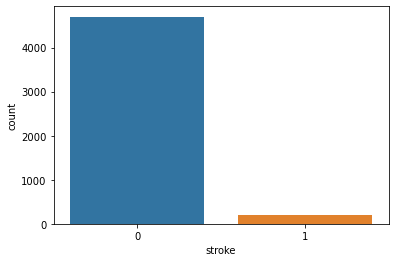

In [10]:
sns.countplot(df['stroke'])

We see that the class is highly imbalanced and we would have to perform class balancing just to ensure that we don't get outputs from the model that are too swayed by the majority class respectively. 

In [11]:
df_majority = df[df.stroke == 0]
df_minority = df[df.stroke == 1]

We would be checking the shape of the majority class and ensure that we understand the total number of rows per different stroke categories.

In [12]:
df_majority.shape

(4700, 12)

We would be checking the minority class and see that we understand the total number of minority classes per different stroke categories. 

In [13]:
df_minority.shape

(209, 12)

We would be upsampling the data and get a good understanding of it and perform visualizations just to get a sense of the data respectively. 

In [14]:
df_minority_upsample = resample(df_minority, replace = True, n_samples = df_majority.shape[0], random_state = 101)

We would be concatenating the data that we have upsampled and downsampled so that we get a good version of it.

In [15]:
df_upsampled = pd.concat([df_majority, df_minority_upsample])

We would again check using the countplot whether there are equal number of classes in our data respectively. 

<AxesSubplot:xlabel='stroke', ylabel='count'>

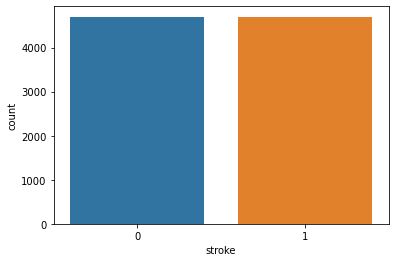

In [16]:
sns.countplot(df_upsampled['stroke'])

We would have to create a copy of the dataframe so that we don't alter the actual dataframe values. Therefore, we use "copy" to ensure that we get the best results respectively. 

In [17]:
df = df_upsampled.copy()

We would create two variables that would take the input and the output respectively. We would have to delete 'stroke' feature in the input as we are going to predict that in the output respectively. In addition to this, we would have to take 'stroke' as the output y respectively as we would be predicting the value. 

In [18]:
X = df.drop('stroke', axis = 1)
y = df['stroke']

In [19]:
len(X)

9400

We would be dividing the data into train and test set respectively. Since we have a large amount of data, we would take about 20 percent of the values to be the test set respectively. 

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)

We would look at the head of the dataframe just to understand the split of training set respectively.

In [21]:
X_train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
465,621,Male,69.0,0,0,Yes,Private,Rural,101.52,26.8,smokes
10,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked
109,59125,Female,53.0,0,0,Yes,Govt_job,Urban,64.17,41.5,never smoked
3567,63949,Female,33.0,0,0,Yes,Govt_job,Urban,75.67,44.7,never smoked
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked


We would use the countplot just to see how the values are present in the output training set respectively

<AxesSubplot:xlabel='stroke', ylabel='count'>

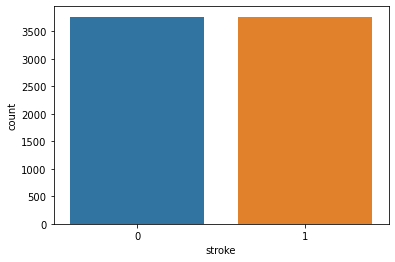

In [22]:
sns.countplot(y_train)

We are again checking the head of the dataframe just to make sure that everything is right. 

In [23]:
X_train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
465,621,Male,69.0,0,0,Yes,Private,Rural,101.52,26.8,smokes
10,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked
109,59125,Female,53.0,0,0,Yes,Govt_job,Urban,64.17,41.5,never smoked
3567,63949,Female,33.0,0,0,Yes,Govt_job,Urban,75.67,44.7,never smoked
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked


We have a specific feature called "Residence_type" where we can check whether the people are from Rural areas or Urban areas respectively. 

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

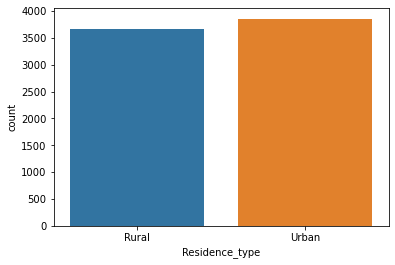

In [24]:
sns.countplot(X_train['Residence_type'])

We would be looking at the mean values after grouping by using the Residence_type and ensure that we get the right outputs respectively. 

In [25]:
X_train.groupby('Residence_type').mean()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
Residence_type,,,,,,
Rural,36852.935897,54.187889,0.185488,0.112111,119.176318,29.455019
Urban,37940.270109,55.253306,0.186300,0.122470,120.757784,29.836430


We would be dividing the data using "work_type" where we would be checking the mean value of the hypertension and plotting a bar plot.

<AxesSubplot:xlabel='work_type'>

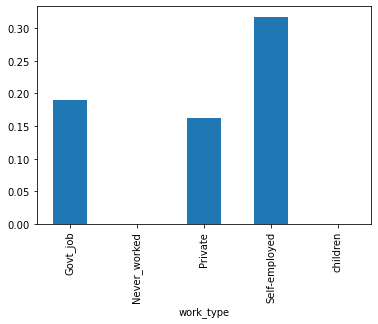

In [26]:
X_train.groupby('work_type').mean()['hypertension'].plot.bar()

We would be looking at different types of work and the unique categories associated with it. We see different types of works that are unique. 

In [27]:
X_train['work_type'].unique()

array(['Private', 'Govt_job', 'Self-employed', 'children', 'Never_worked'],
      dtype=object)

We would uniquely identify the people who has never worked and see some of the trends that are present in the data respectively. 

In [28]:
X_train[X_train['work_type'] == 'Never_worked']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4772,13960,Female,18.0,0,0,No,Never_worked,Urban,97.65,21.5,Unknown
1922,51935,Male,16.0,0,0,No,Never_worked,Urban,59.99,28.2,never smoked
4611,18605,Female,17.0,0,0,No,Never_worked,Urban,78.08,44.9,never smoked
603,61408,Male,23.0,0,0,No,Never_worked,Urban,125.26,18.7,never smoked
3468,37209,Male,17.0,0,0,No,Never_worked,Rural,124.38,31.2,never smoked
3196,57274,Male,14.0,0,0,No,Never_worked,Urban,137.91,41.8,never smoked
1789,13862,Female,13.0,0,0,No,Never_worked,Urban,70.93,22.9,never smoked
2781,23587,Female,16.0,0,0,No,Never_worked,Urban,84.40,25.9,never smoked
2346,61219,Female,14.0,0,0,No,Never_worked,Urban,148.37,22.7,never smoked
4785,58652,Female,16.0,0,0,No,Never_worked,Rural,68.27,20.4,never smoked


We would be looking at the type of work where they are self-employed respectively. We could count the total number of cases where they had a heart disease. 

<AxesSubplot:>

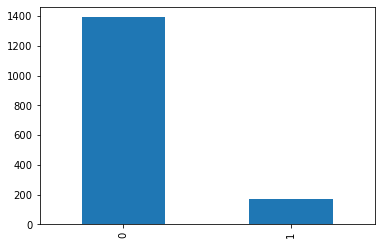

In [29]:
X_train[X_train['work_type'] == 'Self-employed']['heart_disease'].value_counts().plot.bar()

We would also check whether they have never worked. In addition, we would also count the total number of cases where they had a heart disease respectively.

<AxesSubplot:>

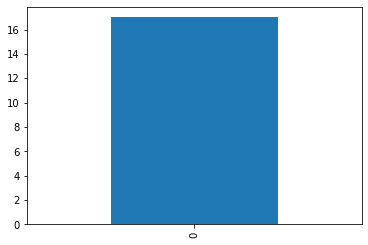

In [30]:
X_train[X_train['work_type'] == 'Never_worked']['heart_disease'].value_counts().plot.bar()

We see from the above that people who never smoked do not have any heart disease from our data. That is quite true in the real-world respectively. 

<AxesSubplot:>

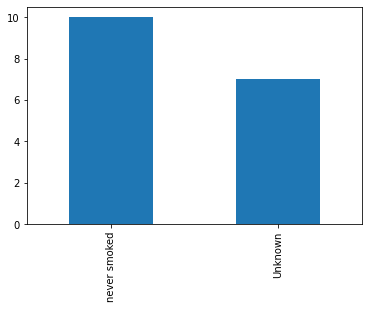

In [31]:
X_train[X_train['work_type'] == 'Never_worked']['smoking_status'].value_counts().plot.bar()

We would check the smoking status of the people that are present in our data respectively. We can see that there are many people who never smoked respectively. We see that in comparision to the non-smokers, there are a few smokers respectively.

<AxesSubplot:>

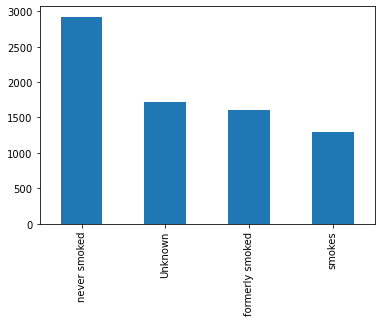

In [32]:
X_train['smoking_status'].value_counts().plot.bar()

We would be looking at the trends where the people have not smoked respectively. We would look at the case of hypertension of these people just to get an understanding of the values that are present in the data respectively.

<AxesSubplot:>

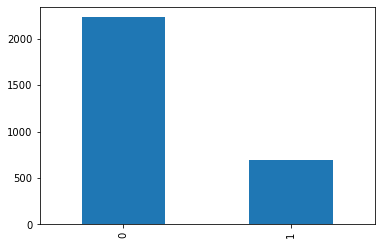

In [33]:
X_train[X_train['smoking_status'] == 'never smoked']['hypertension'].value_counts().plot.bar()

We would be looking at the trends where people would be smoking and see the case of hypertension respectively. We would be again plotting a barplot and get a good understanding of the data.

<AxesSubplot:>

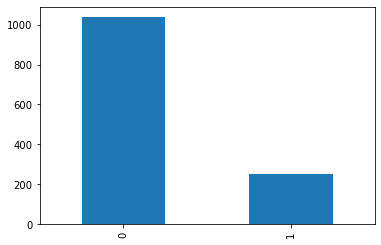

In [34]:
X_train[X_train['smoking_status'] == 'smokes']['hypertension'].value_counts().plot.bar()


We would take into account the correlation between the various values in the training data and plot them later to understand how different features are related to each other.

In [35]:
X_train_corr = X_train.corr()

We would be using heatmap from seaborn which would allow us to understand the correlation better using different color intensities.

<AxesSubplot:>

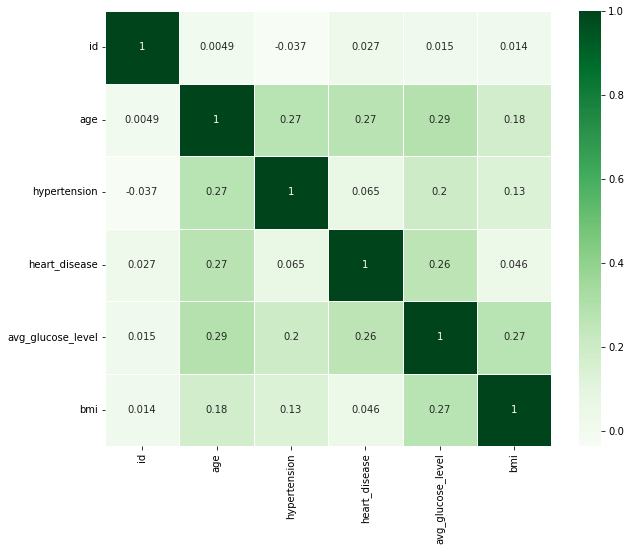

In [36]:
plt.figure(figsize = (10, 8))
sns.heatmap(X_train_corr, annot = True, cmap = "Greens", linewidths = 0.5)

From the observation, it can be seen that age is quite related to whether a person would have hypertension, heart_disease, avg_glucose_level and bmi as can be seen above.

In [37]:
X_train_df = pd.concat([X_train, y_train], axis = 1)

We would be concatenating the data values and then be checking the dataframe to see if there are any values that are related to each other respectively. 

In [38]:
X_train_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
465,621,Male,69.0,0,0,Yes,Private,Rural,101.52,26.8,smokes,0
10,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
109,59125,Female,53.0,0,0,Yes,Govt_job,Urban,64.17,41.5,never smoked,1
3567,63949,Female,33.0,0,0,Yes,Govt_job,Urban,75.67,44.7,never smoked,0
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
859,40970,Male,43.0,0,0,Yes,Private,Urban,135.75,35.9,smokes,0
108,30456,Female,79.0,0,0,Yes,Private,Rural,93.05,24.2,never smoked,1
107,12062,Female,54.0,0,0,Yes,Self-employed,Rural,191.82,40.4,smokes,1
1657,48210,Male,59.0,0,0,Yes,Private,Rural,64.51,31.5,never smoked,0


We would be using the distribution plot where we can understand how the values of age are distributed. We see that there are a lot of people in the age of 80 compared to the rest. Therefore, we can get a good understanding of the data.

<AxesSubplot:xlabel='age', ylabel='Density'>

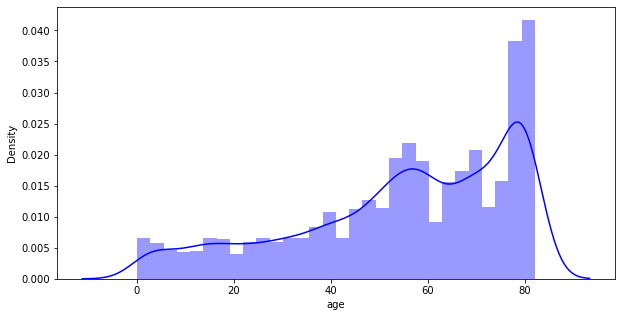

In [39]:
plt.figure(figsize = (10, 5))
sns.distplot(X_train_df['age'], bins = 30, kde = True, color = 'Blue')

We would be using average glucose level and check the distribution respectively. We see how those values are distributed and most of the values lie in the range from 100 to 150 respectively. There are a few cases where they lie from 150 to 250.

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

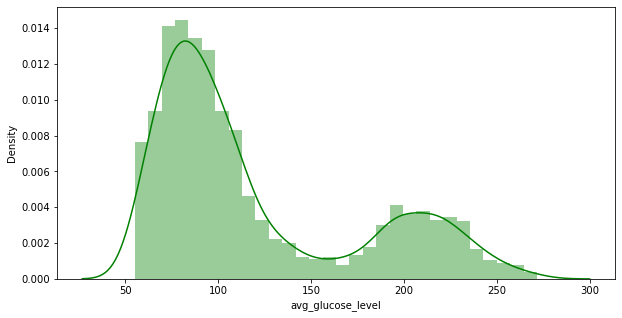

In [40]:
plt.figure(figsize = (10, 5))
sns.distplot(X_train_df['avg_glucose_level'], bins = 30, kde = True, color = 'Green', hist = True)

We would see the percentage of people who have stroke based on the average glucose levels respectively. We would be looking at the values of people which are above 150 and calculating their percentage of having a stroke. 

In [41]:
high_glucose_stroke_percent = (X_train_df[(X_train_df['avg_glucose_level'] > 150)]['stroke'].value_counts()[1]) / (X_train_df[(X_train_df['avg_glucose_level'] > 150)]['stroke'].value_counts()[1] + X_train_df[(X_train_df['avg_glucose_level'] > 150)]['stroke'].value_counts()[0]) * 100

In [42]:
print("The percent of people who are high glucose and have stroke are {}%".format(np.round(high_glucose_stroke_percent, 2)))

The percent of people who are high glucose and have stroke are 75.09%


Based on the above percentage, we see that there is a higher change for a person who has a high glucose level to have stroke respectively.

In [43]:
low_glucose_stroke_percent = (X_train_df[(X_train_df['avg_glucose_level'] < 150)]['stroke'].value_counts()[1]) / (X_train_df[(X_train_df['avg_glucose_level'] < 150)]['stroke'].value_counts()[1] + X_train_df[(X_train_df['avg_glucose_level'] < 150)]['stroke'].value_counts()[0]) * 100

In [44]:
print("The percent of people who are low glucose and have stroke are {}%".format(np.round(low_glucose_stroke_percent, 2)))

The percent of people who are low glucose and have stroke are 41.29%


Based on the above percentage, we see that there is a lower chance for a person who has a low glucose level to have stroke respectively. 

In [45]:
X_train_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
465,621,Male,69.0,0,0,Yes,Private,Rural,101.52,26.8,smokes,0
10,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
109,59125,Female,53.0,0,0,Yes,Govt_job,Urban,64.17,41.5,never smoked,1
3567,63949,Female,33.0,0,0,Yes,Govt_job,Urban,75.67,44.7,never smoked,0
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


We would be checking the head of the training dataframe to understand the values present in them respectively.

In [46]:
X_train_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
465,621,Male,69.0,0,0,Yes,Private,Rural,101.52,26.8,smokes,0
10,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
109,59125,Female,53.0,0,0,Yes,Govt_job,Urban,64.17,41.5,never smoked,1
3567,63949,Female,33.0,0,0,Yes,Govt_job,Urban,75.67,44.7,never smoked,0
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
859,40970,Male,43.0,0,0,Yes,Private,Urban,135.75,35.9,smokes,0
108,30456,Female,79.0,0,0,Yes,Private,Rural,93.05,24.2,never smoked,1
107,12062,Female,54.0,0,0,Yes,Self-employed,Rural,191.82,40.4,smokes,1
1657,48210,Male,59.0,0,0,Yes,Private,Rural,64.51,31.5,never smoked,0


We would also look at the total number of values present per gender in the variables respectively. 

<AxesSubplot:>

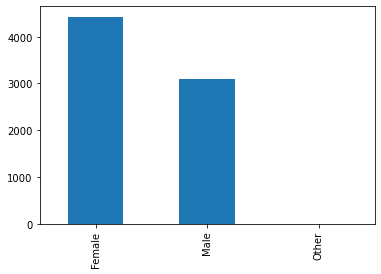

In [47]:
X_train_df['gender'].value_counts().plot.bar()

We are also checking the type of the dataframe that is present. 

In [48]:
type(X_train_df['gender'])

pandas.core.series.Series

In [49]:
X_train_df['gender'].value_counts()

Female    4429
Male      3090
Other        1
Name: gender, dtype: int64

In [50]:
X_train_df = X_train_df[X_train_df['gender'] != 'Other']

We are again just checking the age distribution. 

<AxesSubplot:xlabel='age', ylabel='Density'>

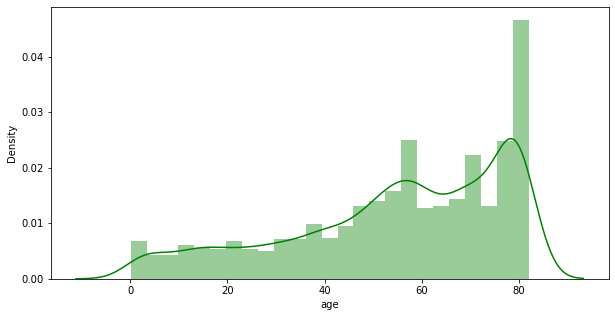

In [51]:
plt.figure(figsize = (10, 5))
sns.distplot(X_train_df['age'], color = 'green')

In [52]:
X_train_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
465,621,Male,69.0,0,0,Yes,Private,Rural,101.52,26.8,smokes,0
10,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
109,59125,Female,53.0,0,0,Yes,Govt_job,Urban,64.17,41.5,never smoked,1
3567,63949,Female,33.0,0,0,Yes,Govt_job,Urban,75.67,44.7,never smoked,0
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


We are looking at the data and trying to understand the average age of people who are either married or not married respectively. 

In [53]:
X_train_df.groupby('ever_married').mean()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
ever_married,,,,,,,
No,37586.832858,31.538528,0.113520,0.050770,98.221363,26.166115,0.223046
Yes,37353.241415,61.790843,0.207943,0.137704,126.599983,30.711082,0.583073


We would be grouping these values together and understanding the data respectively.

<AxesSubplot:xlabel='ever_married,gender'>

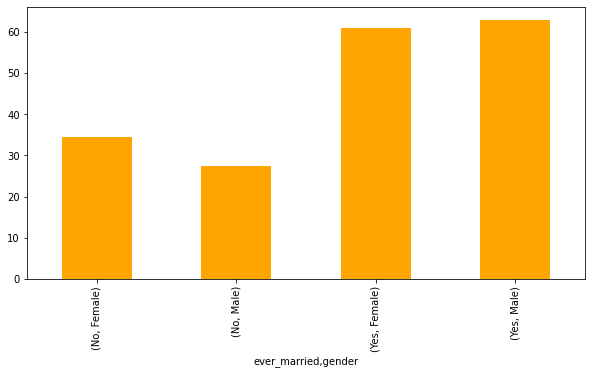

In [54]:
plt.figure(figsize = (10, 5))
X_train_df.groupby(['ever_married', 'gender'])['age'].mean().plot.bar(color = 'orange')

In [55]:
X_train_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
465,621,Male,69.0,0,0,Yes,Private,Rural,101.52,26.8,smokes,0
10,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
109,59125,Female,53.0,0,0,Yes,Govt_job,Urban,64.17,41.5,never smoked,1
3567,63949,Female,33.0,0,0,Yes,Govt_job,Urban,75.67,44.7,never smoked,0
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

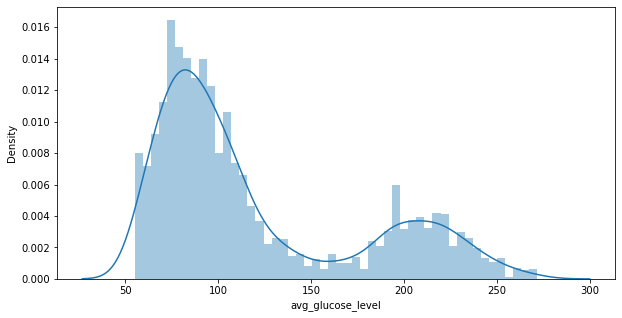

In [56]:
plt.figure(figsize = (10, 5))
sns.distplot(X_train_df['avg_glucose_level'], bins = 50)

We would use the describe function and see the different percentile values present in our data respectively to get an understanding of it. 

In [57]:
X_train_df.describe(percentiles = [0.1, 0.2, 0.5, 0.8, 0.9])

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,7519.000000,7519.000000,7519.000000,7519.000000,7519.000000,7519.000000,7519.000000
mean,37407.701556,54.737736,0.185929,0.117436,119.983715,29.651456,0.499136
std,21508.354421,22.356951,0.389075,0.321960,56.157965,7.349265,0.500033
min,77.000000,0.080000,0.000000,0.000000,55.120000,11.300000,0.000000
10%,6985.600000,18.000000,0.000000,0.000000,67.410000,21.300000,0.000000
20%,13998.800000,35.000000,0.000000,0.000000,74.986000,23.900000,0.000000
50%,37060.000000,59.000000,0.000000,0.000000,97.430000,28.600000,0.000000
80%,59437.000000,77.000000,0.000000,0.000000,190.140000,34.800000,1.000000
90%,66639.800000,80.000000,1.000000,1.000000,215.940000,39.200000,1.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


We are again plotting a correlation matrix and checking the heatmap with different colors. 

<AxesSubplot:>

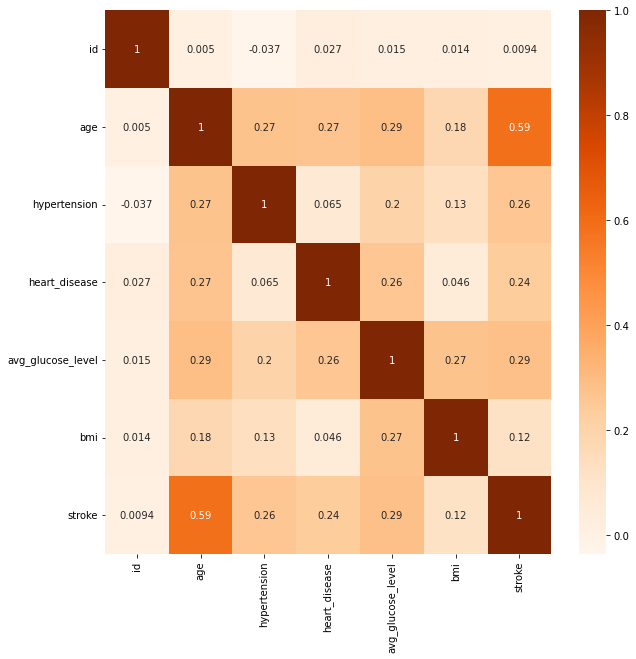

In [58]:
plt.figure(figsize = (10, 10))
sns.heatmap(X_train_df.corr(), annot = True, cmap = 'Oranges')

Age is a significant factor that would determine if a person would have a stroke or not. We see that the machine learning models are going to be using different parameters and the more we are learning the different models respectively, the better would the machine learning algorithms perform in the long term. 

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

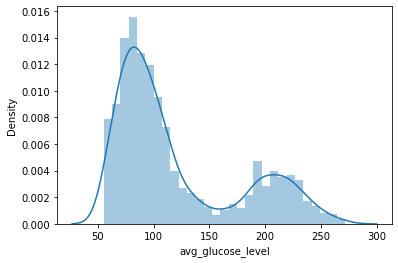

In [59]:
sns.distplot(X_train_df['avg_glucose_level'])

This is a simple way where we can get many countplots using the subplot feature in python. We would be able to get the different plots using subplots respectively. 

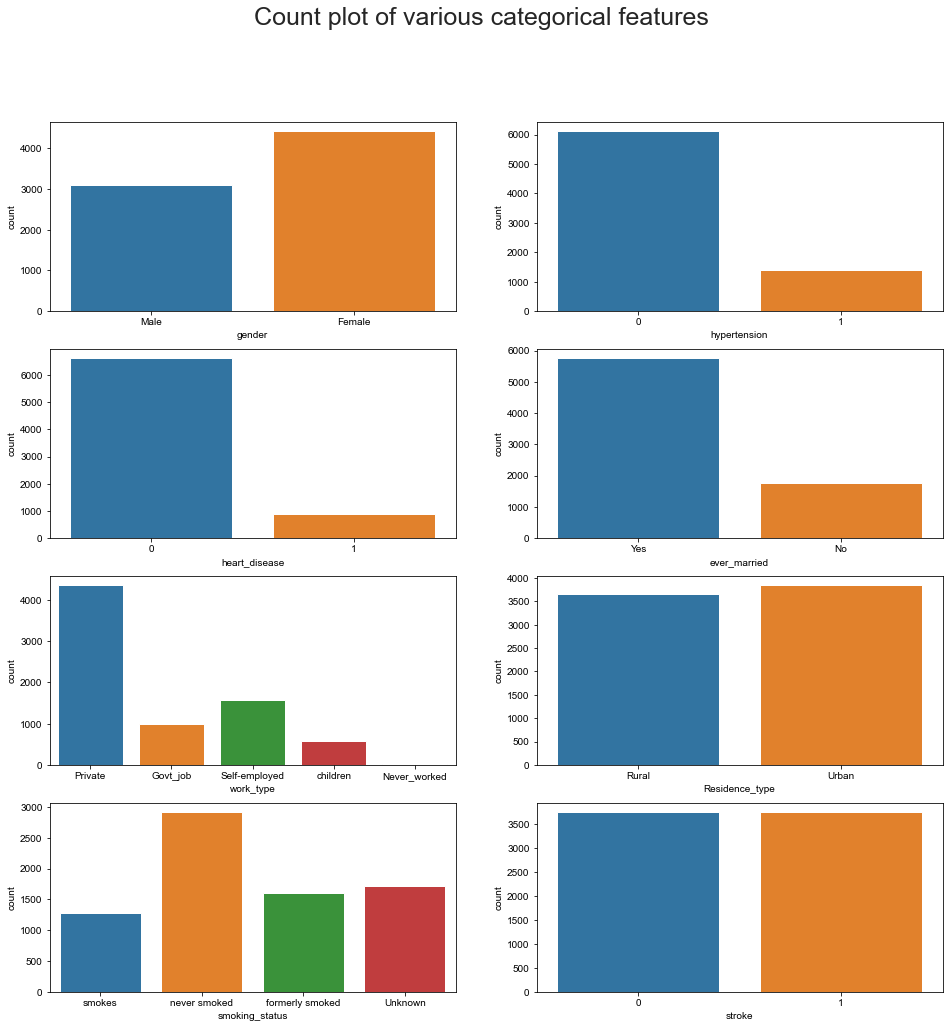

In [60]:
fig, axes = plt.subplots(4, 2, figsize = (16, 16))
sns.set_style('whitegrid')
fig.suptitle("Count plot of various categorical features", fontsize = 25)

sns.countplot(ax = axes[0, 0], data = X_train_df, x= 'gender')
sns.countplot(ax = axes[0, 1], data = X_train_df, x= 'hypertension')
sns.countplot(ax = axes[1, 0], data = X_train_df, x= 'heart_disease')
sns.countplot(ax = axes[1, 1], data = X_train_df, x= 'ever_married')
sns.countplot(ax = axes[2, 0], data = X_train_df, x= 'work_type')
sns.countplot(ax = axes[2, 1], data = X_train_df, x= 'Residence_type')
sns.countplot(ax = axes[3, 0], data = X_train_df, x= 'smoking_status')
sns.countplot(ax = axes[3, 1], data = X_train_df, x= 'stroke')

plt.show()

We would be using a countplot and checking the total number of people who either have or don't have heart disease. We would also set the hue to the be final output variable that we would be predicting respectively.

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

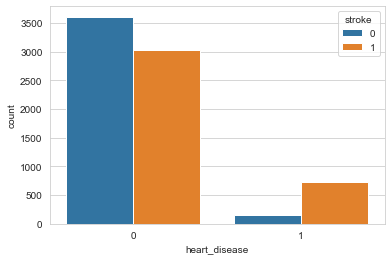

In [61]:
sns.countplot(data = X_train_df, x= 'heart_disease', hue = 'stroke')

We would be using countplot and checking the age and counting the total number of people present based on age. 

<AxesSubplot:xlabel='age', ylabel='count'>

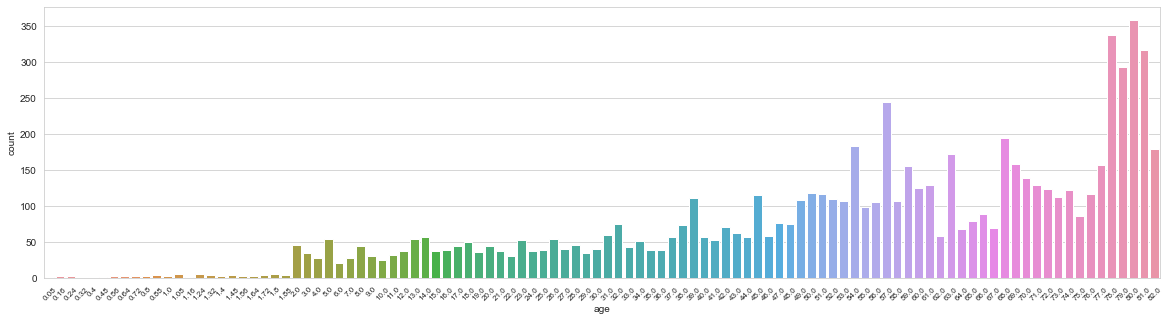

In [62]:
plt.figure(figsize = (20, 5))
plt.xticks(rotation = 45, fontsize = 8)
sns.countplot(data = X_train_df, x = 'age')

We would be using the X_train just to get an understanding of the data respectively. 

In [63]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7520 entries, 465 to 1855
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7520 non-null   int64  
 1   gender             7520 non-null   object 
 2   age                7520 non-null   float64
 3   hypertension       7520 non-null   int64  
 4   heart_disease      7520 non-null   int64  
 5   ever_married       7520 non-null   object 
 6   work_type          7520 non-null   object 
 7   Residence_type     7520 non-null   object 
 8   avg_glucose_level  7520 non-null   float64
 9   bmi                7520 non-null   float64
 10  smoking_status     7520 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 963.0+ KB


We would be importing a few libraries that are important later in the project respectively.

In [64]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

We are going to again read the head of the dataframe and get an understanding of it.

In [65]:
X_train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
465,621,Male,69.0,0,0,Yes,Private,Rural,101.52,26.8,smokes
10,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked
109,59125,Female,53.0,0,0,Yes,Govt_job,Urban,64.17,41.5,never smoked
3567,63949,Female,33.0,0,0,Yes,Govt_job,Urban,75.67,44.7,never smoked
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked


We would use value counts and count the total number of people who are present on the basis of gender.

In [66]:
X_train['gender'].value_counts()

Female    4429
Male      3090
Other        1
Name: gender, dtype: int64

We would count the number of people based on work type respectively.

In [67]:
X_train['work_type'].value_counts()

Private          4370
Self-employed    1563
Govt_job          994
children          576
Never_worked       17
Name: work_type, dtype: int64

In [68]:
pd.get_dummies(X_train[['gender', 'Residence_type']])

,gender_Female,gender_Male,gender_Other,Residence_type_Rural,Residence_type_Urban
465,0,1,0,1,0
10,1,0,0,1,0
109,1,0,0,0,1
3567,1,0,0,0,1
5,0,1,0,0,1
...,...,...,...,...,...
859,0,1,0,0,1
108,1,0,0,1,0
107,1,0,0,1,0
1657,0,1,0,1,0


We use value_counts to count the total number of Urban and Rural people separately in our dataset. 

In [69]:
X_train['Residence_type'].value_counts()

Urban    3854
Rural    3666
Name: Residence_type, dtype: int64

In [70]:
encoder = OneHotEncoder()
encoder.fit(X_train[['gender', 'work_type']])
new_output = encoder.transform(X_train[['gender', 'work_type']])
print(new_output)

  (0, 1)	1.0
  (0, 5)	1.0
  (1, 0)	1.0
  (1, 5)	1.0
  (2, 0)	1.0
  (2, 3)	1.0
  (3, 0)	1.0
  (3, 3)	1.0
  (4, 1)	1.0
  (4, 5)	1.0
  (5, 1)	1.0
  (5, 6)	1.0
  (6, 0)	1.0
  (6, 5)	1.0
  (7, 0)	1.0
  (7, 5)	1.0
  (8, 1)	1.0
  (8, 5)	1.0
  (9, 0)	1.0
  (9, 7)	1.0
  (10, 0)	1.0
  (10, 5)	1.0
  (11, 0)	1.0
  (11, 7)	1.0
  (12, 1)	1.0
  :	:
  (7507, 5)	1.0
  (7508, 1)	1.0
  (7508, 5)	1.0
  (7509, 0)	1.0
  (7509, 5)	1.0
  (7510, 0)	1.0
  (7510, 5)	1.0
  (7511, 1)	1.0
  (7511, 6)	1.0
  (7512, 0)	1.0
  (7512, 5)	1.0
  (7513, 0)	1.0
  (7513, 6)	1.0
  (7514, 1)	1.0
  (7514, 3)	1.0
  (7515, 1)	1.0
  (7515, 5)	1.0
  (7516, 0)	1.0
  (7516, 5)	1.0
  (7517, 0)	1.0
  (7517, 6)	1.0
  (7518, 1)	1.0
  (7518, 5)	1.0
  (7519, 0)	1.0
  (7519, 5)	1.0


In [71]:
X_train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
465,621,Male,69.0,0,0,Yes,Private,Rural,101.52,26.8,smokes
10,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked
109,59125,Female,53.0,0,0,Yes,Govt_job,Urban,64.17,41.5,never smoked
3567,63949,Female,33.0,0,0,Yes,Govt_job,Urban,75.67,44.7,never smoked
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked


We would be using the minmax scaler and understanding the data respectively. 

In [72]:
scaler = MinMaxScaler()
type(scaler.fit_transform(X_train[['age', 'heart_disease']]))

numpy.ndarray

We would get the copies of the X_train and X_test so that those values are not altered during the process of feature transformation. 

In [73]:
X_train_new = X_train.copy()
X_test_new = X_test.copy()

The type of the new matrix is csr matrix.

In [74]:
type(new_output)

scipy.sparse.csr.csr_matrix

We would be defining a function that would take the different preprocessing steps and convert all those values at once respectively. There are different things that we would be doing in this function. We would take different categorical variables and perform one hot encoding out of them. Later, we would be performing min-max scaling where we are trying to contrain the input values between 0 and 1 so that it becomes easy for machine learning models to interpret them respectively.

In [75]:
def preprocessing_steps(data_train, data_test):
    cat_variables = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
    encoder = OneHotEncoder()
    one_hot_encoded_output_train = encoder.fit_transform(data_train[cat_variables])
    one_hot_encoded_output_test = encoder.transform(data_test[cat_variables])
    #print(one_hot_encoded_output_train)
    one_hot_encoded_output_train = one_hot_encoded_output_train.toarray()
    one_hot_encoded_output_test = one_hot_encoded_output_test.toarray()
    print(one_hot_encoded_output_train)
    data_train.drop(['id'], axis = 1, inplace = True)
    data_test.drop(['id'], axis = 1, inplace = True)
    data_train.drop(cat_variables, axis = 1, inplace = True)
    data_test.drop(cat_variables, axis = 1, inplace = True)
    data_train = data_train.to_numpy()
    data_test = data_test.to_numpy()
    data_train = np.concatenate((data_train, one_hot_encoded_output_train), axis = 1)
    data_test = np.concatenate((data_test, one_hot_encoded_output_test), axis = 1)
    print(data_train)
    scaler = MinMaxScaler()
    data_train = scaler.fit_transform(data_train)
    data_test = scaler.transform(data_test)

    return data_train, data_test  

We would be using the above defined function and store the different values in different variables.

In [76]:
X_train_preprocessed, X_test_preprocessed = preprocessing_steps(X_train_new, X_test_new)

[[0. 1. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 ...
 [1. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 1.]]
[[69.  0.  0. ...  0.  0.  1.]
 [81.  1.  0. ...  0.  1.  0.]
 [53.  0.  0. ...  0.  1.  0.]
 ...
 [54.  0.  0. ...  0.  0.  1.]
 [59.  0.  0. ...  0.  1.  0.]
 [47.  0.  0. ...  0.  0.  1.]]


We would just be looking at one value and understand it.

In [77]:
X_train_preprocessed[0]

array([0.84130859, 0.        , 0.        , 0.21419998, 0.17960603,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       1.        ])

We would be looking at the shape of the preprocessed input respectively below.

In [78]:
X_train_preprocessed.shape

(7520, 21)

We would be looking at the shape of the preprocessed test input respectively below just to make sure we are in the right direction. 

In [79]:
X_test_preprocessed.shape

(1880, 21)

We would be importing different libraries that could be used in different ways respectively. 

In [80]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import calibration
from sklearn.metrics import log_loss
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV

## Support Vector Machines

We would be using the support vector machines and see the different values of alpha and compare the losses so that we get the best output respectively. Support vector machines would take into consideration the vectors that are close to classification line and ensure that the distance between the vectors is maximized so that we could be able to better classify the results respestively. 

In [ ]:

#-------------------------------------
alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf.fit(X_train_preprocessed, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_preprocessed, y_train)
    sig_clf_probs = sig_clf.predict_proba(X_test_preprocessed)
    cv_log_error_array.append(log_loss(y_test, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_test, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train_preprocessed, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_preprocessed, y_train)

predict_y = sig_clf.predict_proba(X_train_preprocessed)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_preprocessed)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_preprocessed)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

for alpha = 1e-05
Log Loss : 0.5650802533269054
for alpha = 0.0001
Log Loss : 0.5650802530486929
for alpha = 0.001
Log Loss : 0.5512450768665025
for alpha = 0.01
Log Loss : 0.4665464572785248
for alpha = 0.1
Log Loss : 0.45794223825221264
for alpha = 1
Log Loss : 0.458080337311355
for alpha = 10


We would be using the value of alpha to be equal to 1 and ensure that we get the best output respectively. We are going to be using the value of alpha to be equal to 1 and then testing the output respectively. We see that the accuracy is about 78 percent for the test set. In addition, we see that the F1 score is about 0.78 which is not very bad respectively. Precision and recall are also not that bad as they lie between 0.7 to 0.9 respectively. Therefore, we can say that support vector machines is performing well on the test set respectively. 

In [ ]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

--------------------------------

clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf.fit(X_train_preprocessed, y_train)
y_predictions = clf.predict(X_test_preprocessed)
print(classification_report(y_predictions, y_test))